# packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")

# Data

In [58]:
#dummy data to test clustering
X, _ = make_classification(n_samples=1000, n_features=15)

# sklearn 

In [67]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=11)
xx=pca.fit_transform(X) 
print(np.sum(pca.explained_variance_ratio_[:11]))

0.8940149225089129


# implementation

In [68]:
class PCA ():
    
    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):
        self.mean = np.mean(X, axis = 0)
        self.std = np.std(X, axis = 0)
        #normalization & scalling
        X_new=(X-self.mean)/self.std
        #cav matrix
        cov_m=np.cov(X_new, rowvar=False)
        #calculate pca
        self.evalue, evect=np.linalg.eig(cov_m)
        #sort the eigenvalues in descending order
        sorted_index = np.argsort(self.evalue)[::-1]
        self.evalue = self.evalue[sorted_index]
        #similarly sort the eigenvectors 
        evect = evect[:,sorted_index]
        evalue_cum=np.cumsum(self.evalue)
        evalue_cum=evalue_cum/evalue_cum[-1]
        self.no_of_component=next(x[0] for x in enumerate(evalue_cum) if x[1] > self.n_components)+1
        print("no of component:",self.no_of_component,",variance: ",evalue_cum[self.no_of_component-1])
        self.components=evect[:,self.no_of_component]
        self.variance=self.evalue[:self.no_of_component]
        X_new=np.dot(X_new,self.components)
        
        return X_new

    def transform(self,Z):
        mean = np.mean(Z, axis = 0)
        std = np.std(Z, axis = 0)
        Z_new = (Z - mean )/std
        Z_new =np.dot( Z_new , self.components)

        return Z_new

    #optional 
    def plot_explained_variance(self):
        L=len(self.evalue)+1
        x= np.arange(1, L, 1).tolist()
        evalue_cum=np.cumsum(self.evalue)
        evalue_cum=evalue_cum/evalue_cum[-1]
        plt.plot(x,evalue_cum)
        plt.show()


no of component: 11 ,variance:  0.8880932800719971


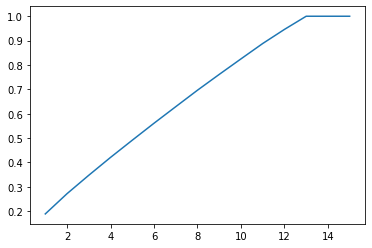

In [69]:
pca=PCA(.87)
xx=pca.fit(X)
pca.plot_explained_variance()